In [1]:
using ElectromagneticFields

In [2]:
using Makie

In [3]:
const R0 = 1.
const B0 = 1.
const q  = 2.
;

In [4]:
eq = AxisymmetricTokamakCylindrical(R0, B0, q)

Axisymmetric Tokamak Equilibrium in (R,Z,ϕ) Coordinates with
  R₀ = 1.0
  B₀ = 1.0
  q  = 2.0

In [5]:
load_equilibrium(eq)

In [6]:
nr = 100
nz = 120
nl = 10
;

In [7]:
rgrid = LinRange( 0.25,  2.75, nr)
zgrid = LinRange(-2.0,  +2.0,  nz)
;

In [8]:
field = zeros(nr, nz)
potAR = zeros(nr, nz)
potAZ = zeros(nr, nz)
potAP = zeros(nr, nz)
;

In [9]:
for i in 1:nr
    for j in 1:nz
        field[i,j] = B(rgrid[i], zgrid[j], 0.0)
        potAR[i,j] = A₁(rgrid[i], zgrid[j], 0.0)
        potAZ[i,j] = A₂(rgrid[i], zgrid[j], 0.0)
        potAP[i,j] = A₃(rgrid[i], zgrid[j], 0.0)
    end
end

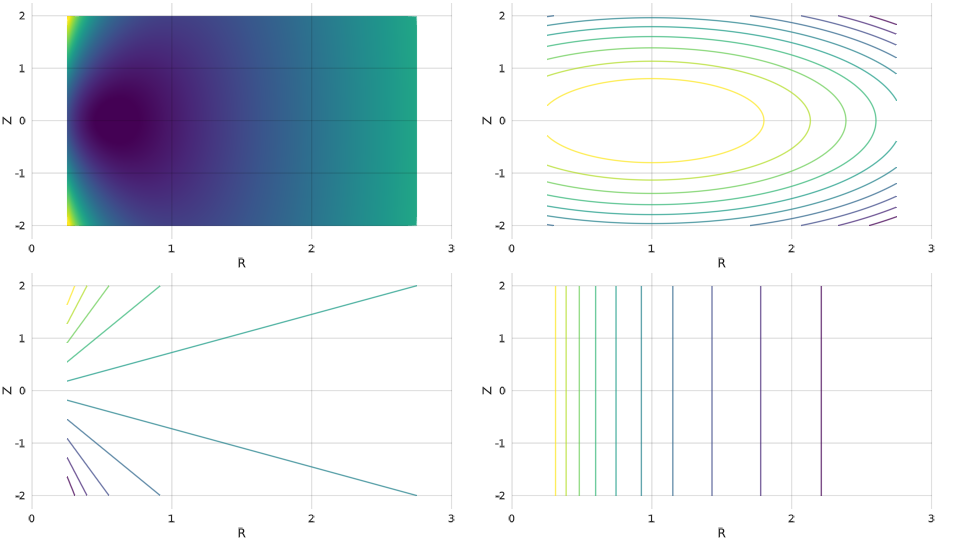

In [10]:
axis = (names = (axisnames = ("R", "Z"),),)
scene = hbox(
    vbox(
        contour(rgrid, zgrid, potAR, axis=axis, levels=nl),#L"$A_R(R,Z)$"
        contour(rgrid, zgrid, potAZ, axis=axis, levels=nl) #L"$A_Z(R,Z)$"
    ),
    vbox(
        contour(rgrid, zgrid, field, axis=axis, levels=nl, linewidth=0, fillrange=true),#L"$B(R,Z)$"
        contour(rgrid, zgrid, potAP, axis=axis, levels=nl) #L"$A_\phi(R,Z)$"
    )
)